In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [50]:
crypto_df = pd.read_csv("crypto_data.csv")
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [73]:
#* Discard all cryptocurrencies that are not being traded. In other words, filter for currencies that are currently being traded. Once you have done this, drop the `IsTrading` column from the dataframe.
df = crypto_df[crypto_df["IsTrading"] == True]
df = df.drop("IsTrading", axis=1)

#* Remove all rows that have at least one null value.
df = df.dropna()

#* Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
df = df[df["TotalCoinsMined"] > 0]

#* In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric. Since the coin names do not contribute to the analysis of the data, delete the `CoinName` from the original dataframe.
df = df.drop("CoinName", axis=1)
cleaned_df = df
cleaned_df

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [74]:
#* Your next step in data preparation is to convert the remaining features with text values, `Algorithm` and `ProofType`, into numerical data. To accomplish this task, use Pandas to create dummy variables. Examine the number of rows and columns of your dataset now. How did they change?
dummy_df = cleaned_df
dummy_df = pd.get_dummies(df,columns=["Algorithm", "ProofType"])
dummy_df = dummy_df.drop("Unnamed: 0", axis=1)
dummy_df


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
#* Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
scaler = StandardScaler().fit(dummy_df)
df_scaled = scaler.transform(dummy_df)
df_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [76]:
### Dimensionality Reduction

#* Creating dummy variables above dramatically increased the number of features in your dataset. Perform dimensionality reduction with PCA.
# Rather than specify the number of principal components when you instantiate the PCA model, it is possible to state the desired **explained variance**.
# For example, say that a dataset has 100 features. Using `PCA(n_components=0.99)` creates a model that will preserve approximately 99% of the explained variance,
# whether that means reducing the dataset to 80 principal components or 3. For this project, preserve 90% of the explained variance in dimensionality reduction.
# How did the number of the features change?
df = df_scaled
pca = PCA(n_components=.9)

df_pca = pca.fit_transform(df)
df_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
         2.61238442e-15, -1.16237158e-15, -2.97878438e-15],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
         1.91187261e-15, -1.27382184e-15, -2.81095070e-15],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
        -4.47833865e-14, -2.90603310e-14,  2.95634812e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
        -5.30804197e-14, -6.36831544e-14, -1.35724543e-13],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
         3.81883034e-15,  1.46238028e-15,  2.61008846e-15],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         3.78155474e-15, -4.53525203e-15,  3.13719586e-15]])

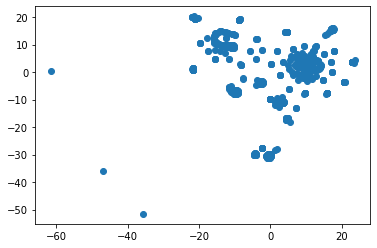

In [78]:
#* Next, further reduce the dataset dimensions with t-SNE and visually inspect the results.
# In order to accomplish this task, run t-SNE on the principal components: the output of the PCA transformation.
# Then create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.

df = df_pca
tsne = TSNE(learning_rate = 35)
tsne_features = tsne.fit_transform(df)
tsne_features.shape

x_val = tsne_features[:,0]
y_val = tsne_features[:,1]

plt.scatter(x_val, y_val)
plt.show()

#Commentary - it looks like there are maybe 2-3 distinctive clusters (some datapoints are difficult to count)

In [72]:
df = df_pca
model = KMeans(n_clusters=3, random_state=5)
model.fit(df)
predictions = model.predict(df)
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [67]:
### Cluster Analysis with k-Means
#* Create an elbow plot to identify the best number of clusters. Use a for-loop to determine the inertia for each `k` between 1 through 10. Determine, if possible, where the elbow of the plot is, and at which value of `k` it appears.


inertia = []
k = list(range(1,11))


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### Recommendation
#* Based on your findings, make a brief (1-2 sentences) recommendation to your clients. Can the cryptocurrencies be clustered together? If so, into how many clusters? 

The submission does 4 or more of the following:

✓ Cryptocurrencies that are not being traded are discarded from the DataFrame.
✓ Rows with null values are discarded.
✓ The DataFrame is filtered for cryptocurrencies that have been mined.
✓ Dummy variables are created for Algorithm and ProofType columns.
✓ Data is standardized with StandardScaler.


The submission does 4 or more of the following: 

✓ PCA model is created and used to reduce dimensions of the scaled dataset.
✓ PCA model’s explained variance is set to 90% (0.9).
✓ The shape of the reduced dataset is examined for reduction in number of features.
✓ t-SNE model is created and used to reduce dimensions of the scaled dataset.
✓ t-SNE is used to create a plot of the reduced features.



The submission does all of the following:

✓ A k-means model is created.
✓ A for-loop is used to create a list of inertias for each k from 1 to 10, inclusive.
✓ A plot is created to examine any elbows that exist.
✓ States a brief (1-2 sentence) conclusion on whether cryptocurrencies can be clustered together, and supports it with findings.